In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl

In [2]:
df = pd.read_csv('data_science.csv')
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.info

<bound method DataFrame.info of      Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD        

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [6]:
df.shape

(607, 11)

#### Finding the average salary by year 

In [13]:
x = round(df.groupby('work_year')['salary_in_usd'].mean(),2)
x

work_year
2020     95813.00
2021     99853.79
2022    124522.01
Name: salary_in_usd, dtype: float64

<Axes: xlabel='work_year'>

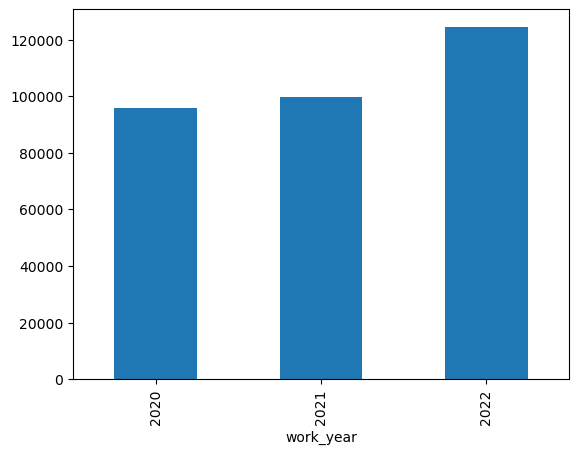

In [12]:
x.plot(kind = 'bar')

#### Showing the ratio of remote or non-remote employees.

In [8]:
df.head(4)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S


In [16]:
ratio = df['remote_ratio'].value_counts()
ratio

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [32]:
values = ratio.to_list()

In [33]:
labels = ['full remote', 'No remote', 'hybrid']

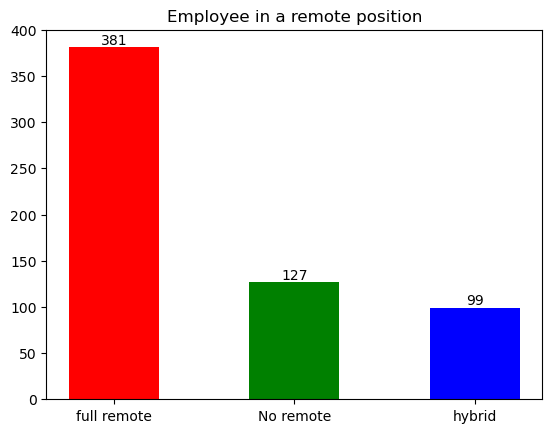

In [44]:
z = plt.bar(labels, values, width=0.5, color=['r', 'g', 'b']) 
plt.bar_label(z, labels= values)
plt.title('Employee in a remote position')
plt.show()

#### Visualize the company size based on the years 

In [45]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [70]:
company_size = df['company_size'].value_counts()
cmpnyname = company_size.index.to_list()

In [51]:
values2 = company_size.values

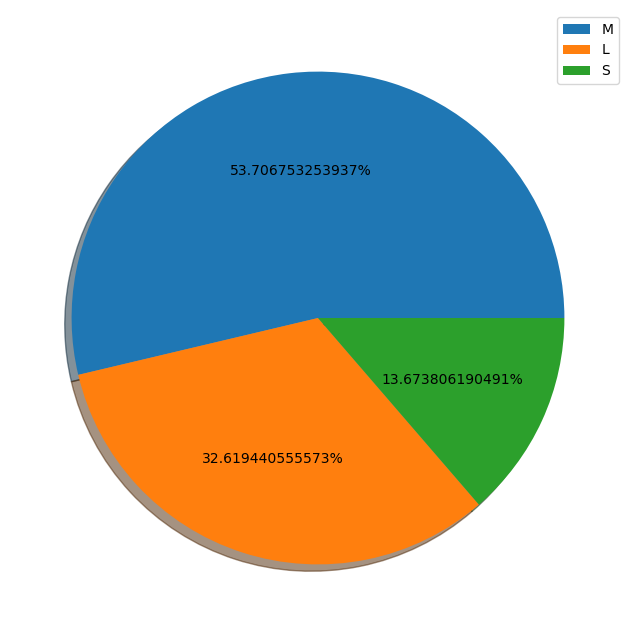

In [74]:
plt.figure(figsize = (13,8))
plt.pie(x = values2, labels = None, autopct = '%1.12f%%', shadow = True)
plt.legend(labels = cmpnyname)
plt.show()

#### Printing out the top 5 job titles 


In [79]:
df['job_title'].value_counts().sort_values(ascending = False).head(5)

job_title
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: count, dtype: int64

####  Finding the distribution of salary by company size  

In [80]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [89]:
dist_sale = df.groupby('company_size')['salary_in_usd'].mean().round(1)

In [105]:
labels1 = dist_sale.index.to_list()

In [103]:
z1 = dist_sale.values

<BarContainer object of 3 artists>

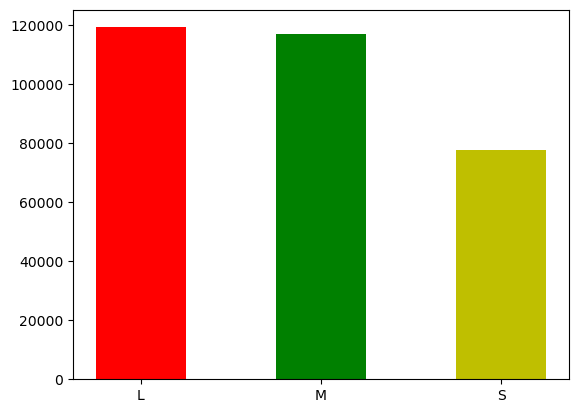

In [116]:
plt.bar(labels1, z1,  width=0.5, color=['r', 'g', 'y'])

#### Creating a histogram showing the distribution of salaries by company size 

In [118]:
dist_sale

company_size
L    119243.0
M    116905.5
S     77632.7
Name: salary_in_usd, dtype: float64

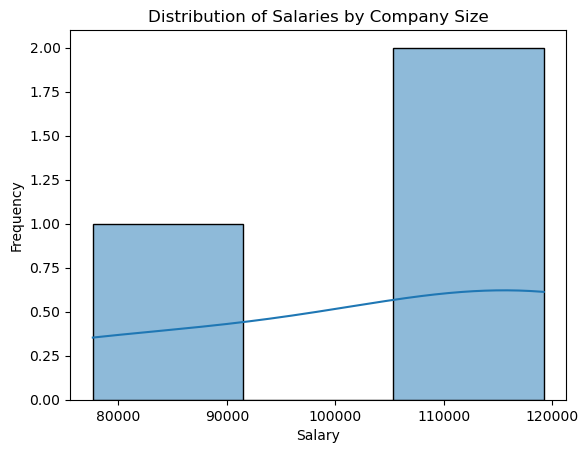

In [127]:
sns.histplot(z1, label = 'Small',kde = True)
plt.xlabel("Salary")  
plt.ylabel("Frequency")  
plt.title("Distribution of Salaries by Company Size")  
plt.show()